Working with Gaussians
=======

### Preliminaries

- Goal 
  - Review of processing of Gaussian distributions in linear systems
- Materials        
  - Mandatory
    - These lecture notes
  - Optional
    - Bishop pp. 85-93       
    - [MacKay - 2006 - The Humble Gaussian Distribution](./files/Mackay-2006-The-humble-Gaussian-distribution.pdf)



### Sums and Transformations of Gaussian Variables

- The Gaussian distribution
$$
\mathcal{N}(x|\mu,\Sigma) = |2 \pi \Sigma |^{-\frac{1}{2}} \,\mathrm{exp}\left\{-\frac{1}{2}(x-\mu)^T \Sigma^{-1} (x-\mu) \right\}
$$
for variable $x$ is completely specified by its mean $\mu$ and variance $\Sigma$. 

- $\Lambda = \Sigma^{-1}$ is called the **precision matrix**.

- A **linear transformation** $z=Ax+b$ of a Gaussian variable $\mathcal{N}(x|\mu,\Sigma)$ is Gaussian distributed as

$$
p(z) = \mathcal{N} \left(z \,|\, A\mu+b, A\Sigma A^T \right) \tag{SRG-4a}
$$

- The **sum of two independent Gaussian variables** is also Gaussian distributed. Specifically, if $x \sim \mathcal{N} \left(x|\mu_x, \Sigma_x \right)$ and $y \sim \mathcal{N} \left(y|\mu_y, \Sigma_y \right)$, then the PDF for $z=x+y$ is given by
$$\begin{align}
p(z) &= \mathcal{N}(x\,|\,\mu_x,\Sigma_x) \ast \mathcal{N}(y\,|\,\mu_y,\Sigma_y) \notag\\
  &= \mathcal{N} \left(z\,|\,\mu_x+\mu_y, \Sigma_x +\Sigma_y \right) \tag{SRG-8}
\end{align}$$
  - <span style="color:green">[Exercise]</span>: Show that Eq.SRG-8 is really a special case of Eq.SRG-4a. 

- The sum of two Gaussian _distributions_ is NOT a Gaussian distribution. Why not?

### Example: Gaussian Signals in a Linear System

<img src="./figures/fig-linear-system.png" width=300px>

- <span style="color:blue">[Q.]</span>: Given independent variables
$x \sim \mathcal{N}(\mu_x,\sigma_y)$ and $y \sim \mathcal{N}(\mu_y,\sigma_y)$, what is the PDF for $z = A\cdot(x -y) + b$ ?

- <span style="color:blue">[A.]</span>: $z$ is also Gaussian with 
$$
p_z(z) = \mathcal{N}(z|A(\mu_x-\mu_y)+b, \, A(\sigma_x \mathbf{+} \sigma_y)A^T)
$$


- Think about the role of the Gaussian distribution for stochastic linear systems in relation to what sinusoidals mean for deterministic linear system analysis.


### Example: Bayesian Estimation of a Constant

<span style="color:blue">[Question]</span>

- Estimate a constant $\theta$ from one 'noisy' measurement $x$ about that constant. Assume the following model specification:
     
$$\begin{align*}
x &= \theta + \epsilon \\
\theta &\sim \mathcal{N}(\theta|\mu_\theta,\sigma_\theta^2) \\
\epsilon &\sim \mathcal{N}(\epsilon|0,\sigma^2_{\epsilon})
\end{align*}$$

<span style="color:blue">[Answer]</span>

1. **Model specification**
Note that you can rewrite these specifications in probabilistic notation as follows:
$$\begin{align}
    p(x|\theta) &=\mathcal{N}(x|\theta,\sigma^2_{\epsilon}) \tag{likelihood}\\
    p(\theta) &=\mathcal{N}(\theta|\mu_\theta,\sigma_\theta^2) \tag{prior}
\end{align}$$
2. **Inference** for the posterior PDF $p(\theta|x)$
$$\begin{align*}
p(\theta|x)  &= \frac{p(x|\theta)p(\theta)}{p(x)} = \frac{p(x|\theta)p(\theta)} { \int p(x|\theta)p(\theta) \, \mathrm{d}\theta } \notag \\
    &= \frac{1}{C} \,\mathcal{N}(x|\theta,\sigma^2_{\epsilon})\, \mathcal{N}(\theta|\mu_\theta,\sigma_\theta^2) \notag \\
    &= \frac{1}{C_1} \mathrm{exp} \left\{ -\frac{(x-\theta)^2}{2\sigma^2_{\epsilon}} - \frac{(\theta-\mu_\theta)^2}{2\sigma_\theta^2} \right\} \notag \\
    &= \frac{1}{C_1} \mathrm{exp} \left\{ \theta^2\left( -\frac{1}{2\sigma^2_{\epsilon}} - \frac{1}{2\sigma_\theta^2} \right) + \theta \left( \frac{x}{\sigma^2_{\epsilon}} + \frac{\mu_\theta}{\sigma_\theta^2} \right) +  C_2 \right\} \notag \\
    &= \frac{1}{C_1} \mathrm{exp} \left\{ -\frac{\sigma_\theta^2 + \sigma^2_{\epsilon}}{2\sigma_\theta^2 \sigma^2_{\epsilon}} \left( \theta - \frac{x\sigma_\theta^2 + \mu_s\sigma^2_{\epsilon}}{\sigma_\theta^2 + \sigma^2_{\epsilon}} \right)^2 + C_3  \right\}
\end{align*}$$
which we recognize as a Gaussian distribution.
  - This computational 'trick' for multiplying two Gaussians is called **completing the square**. Compare the procedure to $$ax^2+bx+c_1 = a\left(x+\frac{b}{2a}\right)^2+c_2$$
  
  
  
- Hence, it follows that the posterior for $\theta$ is
$$\begin{equation*}
    p(\theta|x) = \mathcal{N} (\theta |\, \mu_{\theta|x}, \sigma_{\theta|x}^2)
\end{equation*}$$
where
$$\begin{align*}
  \sigma_{\theta|x}^2  &= \frac{\sigma^2_{\epsilon}\sigma_\theta^2}{\sigma^2_{\epsilon} + \sigma_\theta^2} = \left( \frac{1}{\sigma_\theta^2} + \frac{1}{\sigma^2_{\epsilon}}\right)^{-1} \\
  \mu_{\theta|x}   &= \sigma_{\theta|x}^2 \, \left( \frac{1}{\sigma^2_{\epsilon}}x + \frac{1}{\sigma_\theta^2} \mu_\theta \right) 
\end{align*}$$

- So, multiplication of two Gaussians yields another (unnormalized) Gaussian.

#### CODE EXAMPLE

Let's plot the exact product of two Gaussian PDFs as well as the normalized product according to the above derivation.

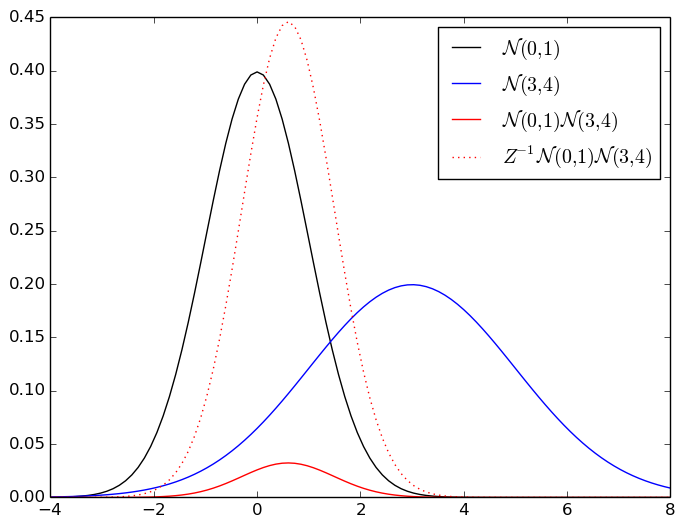

PyObject <matplotlib.legend.Legend object at 0x7f4a634b8fd0>

In [1]:
using PyPlot, Distributions
d1 = Normal(0, 1) # μ=0, σ^2=1
d2 = Normal(3, 2) # μ=3, σ^2=4

# Calculate the parameters of the product d1*d2
s2_prod = (d1.σ^-2 + d2.σ^-2)^-1
m_prod = s2_prod * ((d1.σ^-2)*d1.μ + (d2.σ^-2)*d2.μ)
d_prod = Normal(m_prod, sqrt(s2_prod)) # Note that we neglect the normalization constant.

# Plot stuff
x = linspace(-4, 8, 100)
plot(x, pdf(d1,x), "k")
plot(x, pdf(d2,x), "b")
plot(x, pdf(d1,x) .* pdf(d2,x), "r-") # Plot the exact product
plot(x, pdf(d_prod,x), "r:")          # Plot the normalized Gaussian product
legend([L"\mathcal{N}(0,1)", L"\mathcal{N}(3,4)", L"\mathcal{N}(0,1) \mathcal{N}(3,4)", L"Z^{-1} \mathcal{N}(0,1) \mathcal{N}(3,4)"])

The solid and dotted red curves are identical up to a scaling factor $Z$.

#### END OF CODE EXAMPLE

### Multivariate Gaussian Multiplication

- In general, the multiplication of two multi-variate Gaussians yields an (unnormalized) Gaussian, see [SRG-6]:
$$\begin{equation*}
\mathcal{N}(x|\mu_a,\Sigma_a) \cdot \mathcal{N}(x|\mu_b,\Sigma_b) = \alpha \cdot \mathcal{N}(x|\mu_c,\Sigma_c)
\end{equation*}$$
where
$$\begin{align*}
\Sigma_c &= \left( \Sigma_a^{-1} + \Sigma_b^{-1} \right)^{-1}\\
\mu_c &= \Sigma_c \left( \Sigma_a^{-1}\mu_a + \Sigma_b^{-1}\mu_b\right)
\end{align*}$$
and normalization constant $\alpha = \mathcal{N}(\mu_a|\, \mu_b, \sigma_a + \sigma_b)$.

- If we define the **precision** as $\Lambda \equiv \Sigma^{-1}$, then we see that **precisions add** and **precision-weighted means add** too.

- As we just saw, great application to Bayesian inference!

$$\begin{equation*}
\underbrace{\text{Gaussian}}_{\text{posterior}}
 \propto \underbrace{\text{Gaussian}}_{\text{likelihood}} \times \underbrace{\text{Gaussian}}_{\text{prior}}
\end{equation*}$$


### Conditioning and Marginalization of a Gaussian

Let $z = \begin{bmatrix} x \\ y \end{bmatrix}$ be jointly normal distributed as

$$
p(z|\mu,\Sigma) = \mathcal{N} \left( \begin{bmatrix} x \\ y \end{bmatrix} \left| \begin{bmatrix} \mu_x \\ \mu_y \end{bmatrix}, 
  \begin{bmatrix} \Sigma_x & \Sigma_{xy} \\ \Sigma_{yx} & \Sigma_y \end{bmatrix} \right. \right)
$$

- Note that the symmetry $\Sigma=\Sigma^T$ implies that $\Sigma_x$ and $\Sigma_y$ are symmetric and $\Sigma_{xy} = \Sigma_{yx}^T$.

- Now let's factorize $p(x,y)$ into $p(y|x)\, p(x)$ through conditioning and marginalization (for applications to Bayesian inference in jointly Gaussian systems).

- **Marginalization**
$$
p(x) = \int p(x,y)\,\mathrm{d}y = \mathcal{N}\left( x|\mu_x, \Sigma_x \right), \;\text{and}\; p(y)=\mathcal{N} \left(y|\mu_y, \Sigma_y \right)
$$

- **Conditioning**
$$\begin{align*}
p(y|x) &= p(x,y)/p(x) \\
 &= \mathcal{N}\left(y|\mu_y + \Sigma_{yx}\Sigma_x^{-1}(x-\mu_x),\, \Sigma_y - \Sigma_{yx}\Sigma_x^{-1}\Sigma_{xy} \right)
\end{align*}$$


#### CODE EXAMPLE

Interactive plot of the joint, marginal, and conditional distributions.

Interact.Slider{Float64}([Reactive.Input{Float64}] 0.5,"x",0.5,-2.0:0.1:3.0)

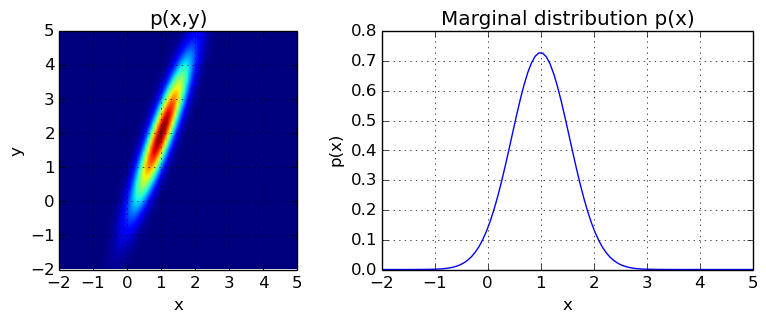

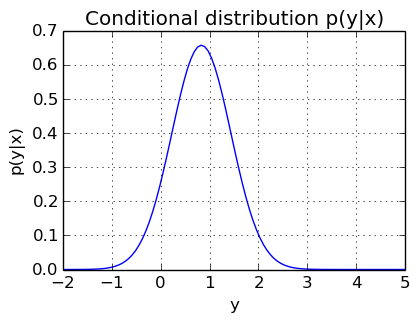

In [2]:
using Reactive, Interact, PyPlot, Distributions
# z = [x; y]
μ = [1.; 2.]
Σ = [0.3 0.7;
     0.7 2.0]
joint = MvNormal(μ,Σ)
marginal_x = Normal(μ[1], sqrt(Σ[1,1]))

# Plot p(x,y)
subplot(221)
joint_pdf = Matrix(100,100)
x_range = linspace(-2,5,100); y_range = linspace(-2,5,100)
for i=1:length(x_range)
    for j=1:length(y_range)
        joint_pdf[i,j] = pdf(joint, [x_range[i];y_range[j]])
    end
end

imshow(joint_pdf', origin="lower", extent=[x_range[1], x_range[end], y_range[1], y_range[end]])
grid(); xlabel("x"); ylabel("y"); title("p(x,y)"); tight_layout()

# Plot p(x)
subplot(222)
plot(linspace(-2,5,100), pdf(marginal_x, linspace(-2,5,100)))
grid(); xlabel("x"); ylabel("p(x)"); title("Marginal distribution p(x)"); tight_layout()

f = figure()
@manipulate for x=-2:0.1:3; withfig(f) do
        conditional_y_m = μ[2]+Σ[2,1]*inv(Σ[1,1])*(x-μ[1])
        conditional_y_s2 = Σ[2,2] - Σ[2,1]*inv(Σ[1,1])*Σ[1,2]
        conditional_y = Normal(conditional_y_m, sqrt(conditional_y_s2))

        # Plot p(y|x)
        subplot(223)
        plot(linspace(-2,5,100), pdf(conditional_y, linspace(-2,5,100)))
        grid(); xlabel("y"); ylabel("p(y|x)"); title("Conditional distribution p(y|x)"); tight_layout()
    end
end

As is clear from the plots, the conditional distribution is a renormalized slice from the joint distribution.

#### END OF CODE EXAMPLE


### Example: Conditioning of Gaussian

Consider (again) the system 

$$\begin{align*}
x &= \theta + \epsilon \\
\theta &\sim \mathcal{N}(\theta|\mu_\theta,\sigma_\theta^2) \\
\epsilon &\sim \mathcal{N}(\epsilon|0,\sigma^2_{\epsilon})
\end{align*}$$

- This system is equivalent to (<span style="color:green">Exercise: derive this!</span>)

$$
p(\theta,x|\,\mu,\sigma) = \mathcal{N} \left( \begin{bmatrix} \theta\\ 
  x \end{bmatrix} 
  \left| \begin{bmatrix} \mu_\theta\\ 
  \mu_\theta\end{bmatrix}, 
         \begin{bmatrix} \sigma_\theta^2 & \sigma_\theta^2\\ 
         \sigma_\theta^2 & \sigma_\theta^2+\sigma_{\epsilon}^2 
  \end{bmatrix} 
  \right. \right)
$$

- Direct substitution of the rule for Gaussian conditioning leads to
$$\begin{align*}
K &= \frac{\sigma_\theta^2}{\sigma_\theta^2+\sigma_{\epsilon}^2} \qquad \text{($K$ is called: Kalman gain)}\\
p(\theta|x) &= \mathcal{N} \left( \theta |\, \mu_\theta + K \cdot (x-\mu_\theta), \, \sigma_\theta^2 \left( 1-k \right) \right)
\end{align*}$$
    
- <span style="color:green">Homework exercises: (1) Actually derive this; (2) show that the result is equivalent to the previous slide on 'estimation of a constant'; and (3) Try to interpret the resulting formula's.</span>

$\longrightarrow$ Moral: For jointly Gaussian systems, we do inference simply in one step by using the formulas for conditioning and marginalization.



### Application: Recursive Bayesian Estimation

Now consider the signal $x(t)=\theta+\epsilon(t)$, where $D_t= \left(x(1),\ldots,x(t)\right)$ is observed _sequentially_ (over time).

Question:
- Derive a recursive algorithm for $p(\theta|D_t)$, i.e., an update rule for $p(\theta|D_t)$ based on $p(\theta|D_{t-1})$ and $x(t)$.
 
Answer: 
- Let's define $p(\theta|D_t) = \mathcal{N}(\mu(t),\sigma^2(t))$ and assume prior $p(\theta) = \mathcal{N}(\mu,\sigma^2)$.
        
- We will solve this by using the estimate after $t-1$ as the **prior distribution** in conjunction with the **likelihood** for observation $x(t)$,
$$\begin{equation*}
p(\mu(t)|D_t) \propto p(x(t)|\mu(t-1),\sigma^2(t-1)) \times p(\mu(t)|D_{t-1})
\end{equation*}$$

- Use the 'batch processing' posteriors for $\mu$ and $\sigma^2$ to get
$$\begin{align}
\hat \mu(t) &= \sigma_{\mu}^2(t) \, \left( \frac{1}{\sigma^2_{\epsilon}(t)}x(t) + \frac{1}{\sigma_{\mu}^2(t-1)} \hat \mu(t-1) \right) \notag \\
    &= \frac{\sigma^2_{\epsilon}(t)}{\sigma^2_{\epsilon}(t)+\sigma_{\mu}^2(t-1)}x(t) + \frac{\sigma_{\mu}^2(t-1)}{\sigma^2_{\epsilon}(t)+\sigma_{\mu}^2(t-1)} \hat \mu(t-1) \notag \\
    &= \hat \mu(t-1) + K(t) \times \left( x(t) - \hat \mu(t-1) \right) \\
\sigma_{\mu}^2(t) &= \sigma_{\mu}^2(t-1) \frac{\sigma^2_{\epsilon}(t)}{\sigma^2_{\epsilon}(t)+\sigma_{\mu}^2(t-1)} \notag \\
    &= \sigma_{\mu}^2(t-1) \left( 1-K(t) \right)
\end{align}$$
where we defined the **Kalman gain**
$$\begin{equation*}
    K(t) =  \frac{\sigma_{\mu}^2(t-1)}{\sigma^2_{\epsilon}(t)+\sigma_{\mu}^2(t-1)}
\end{equation*}$$
- This linear sequential estimator of mean and variance in Gaussian observations is a **Kalman Filter**.
- The new observation $x(t)$ 'corrects' the old estimate $\hat \mu(t-1)$ by a quantity that is proportional to the _innovation_ (or _residual_)  $\left( x(t) - \hat \mu(t-1) \right)$.
- Note that the uncertainty about $\mu$ decreases over time
- Recursive Bayesian estimation is the basis for **adaptive signal processing** algorithms such as Least Mean Squares (LMS) and Recursive Least Squares (RLS).



#### CODE EXAMPLE

Let's implement the Kalman filter described above. We'll use it to recursively estimate the value of $\theta$ based on noisy observations. Use the 'Step' button to see the recursive updates to the posterior $p(\theta|D)$.

Interact.Button{Void}([Reactive.Input{Void}] nothing,"Step",nothing)

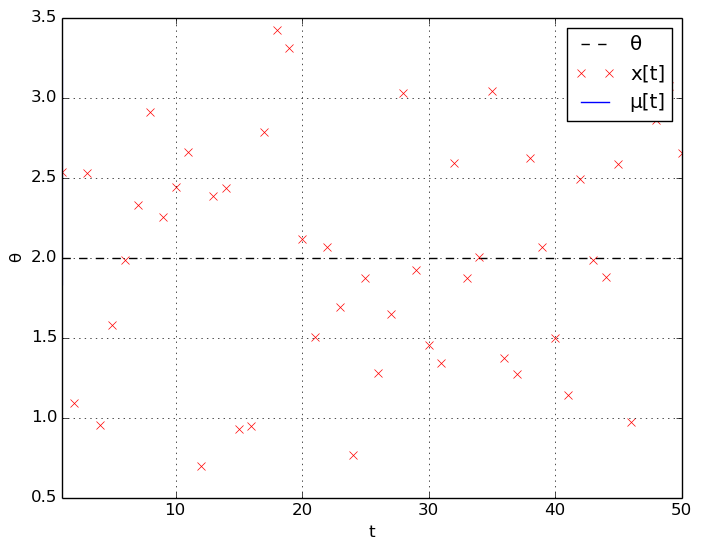

In [4]:
using Reactive, Interact, PyPlot

N = 50  # Number of observations
θ = 2.0 # True value of the variable we want to estimate
σ_ϵ2 = 0.5 # Observation noise variance
x = sqrt(σ_ϵ2) * randn(N) + θ # Generate N noisy observations of θ

f = figure()
global t = 0
global μ = fill!(Vector{Float64}(N), NaN)    # Means of p(θ|D) over time
global σ_μ2 = fill!(Vector{Float64}(N), NaN) # Variances of p(θ|D) over time
@manipulate for 
    perform_step = button("Step");
    withfig(f) do
        if t<=N
            global t += 1
            if t>1 # Use posterior from prev. step as prior
                K = σ_μ2[t-1] / (σ_ϵ2 + σ_μ2[t-1]) # Kalman gain
                μ[t] = μ[t-1] + K*(x[t] - μ[t-1])  # Update mean using (1)
                σ_μ2[t] = σ_μ2[t-1] * (1.0-K)      # Update variance using (2)
            elseif t==1 # Use prior
                # Prior p(θ) = N(0,1000)
                K = 1000.0 / (σ_ϵ2 + 1000.0) # Kalman gain
                μ[t] = 0 + K*(x[t] - 0)      # Update mean using (1)
                σ_μ2[t] = 1000 * (1.0-K)     # Update variance using (2)
            end
            
            # Plot the 'true' value of θ, noisy observations x, and the recursively updated posterior p(θ|D)
            plot([1:N], θ*ones(N), "k--")
            plot([1:N], x, "rx")
            plot([1:N], μ, "b-")
            fill_between([1:N], μ-sqrt(σ_μ2), μ+
            sqrt(σ_μ2), color="b", alpha=0.3)
            legend(["θ", "x[t]", "μ[t]"])
            xlim([1,N]); xlabel("t"); ylabel("θ"); grid()
        end
    end
end 

The shaded area represents 2 standard deviations of posterior $p(\theta|D)$. The variance of the posterior is guaranteed to decrease monotonically for the standard Kalman filter.

#### END OF CODE EXAMPLE

### Product of Normally Distributed Variables

- (We've seen that) the sum of two Gausssian distributed variables is also Gaussian distributed.

- Has the _product_ of two Gaussian distributed variables also a Gaussian distribution?

- **No**! In general this is a difficult computation. As an example, let's compute $p(z)$ for $Z=XY$ for the special case that $X\sim \mathcal{N}(0,1)$ and $Y\sim \mathcal{N}(0,1)$.
$$\begin{align*}
p(z) &= \int_{X,Y} p(z|x,y)\,p(x,y)\,\mathrm{d}x\mathrm{d}y \\
  &= \frac{1}{2 \pi}\int  \delta(z-xy) \, e^{-(x^2+y^2)/2} \, \mathrm{d}x\mathrm{d}y \\
  &=  \frac{1}{\pi} \int_0^\infty \frac{1}{x} e^{-(x^2+z^2/x^2)/2} \, \mathrm{d}x \\
  &= \frac{1}{\pi} \mathrm{K}_0( \lvert z\rvert )\,.
\end{align*}$$
where  $\mathrm{K}_n(z)$ is a [modified Bessel function of the second kind](http://mathworld.wolfram.com/ModifiedBesselFunctionoftheSecondKind.html).

#### CODE EXAMPLE

We plot $p(Z)$ to give an idea of what this distribution looks like.

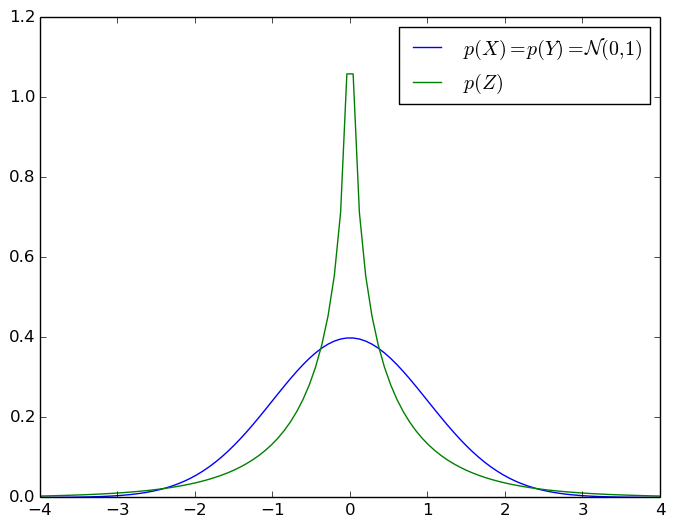

PyObject <matplotlib.legend.Legend object at 0x7f4a612cc310>

In [5]:
using PyPlot, Distributions
X = Normal(0,1)
pdf_product_std_normals(z::Vector) = (besselk(0, abs(z))./π)
range = [linspace(-4,4,100)]
plot(range, pdf(X, range))
plot(range, pdf_product_std_normals(range))
legend([L"p(X)=p(Y)=\mathcal{N}(0,1)", L"p(Z)"])

#### END OF CODE EXAMPLE

### Review Gaussians

The success of Gaussian distributions in probabilistic modeling is large due to the following properties:

- The convolution of two Gaussian functions is another Gaussian function (use in sum of 2 variables)

- The product of two Gaussian functions is another Gaussian function (use in Bayes rule). 

- A linear transformation of a Gaussian distributed variable is also Gaussian distributed

- Conditioning and marginalization of multivariate Gaussian distributions produce Gaussians again (use in working with observations and when doing Bayesian predictions)

- <span style="color:gray">The Gaussian PDF has higher entropy than any other with the same variance. (Not discussed in this course).</span>

- <span style="color:gray">Any smooth function with single rounded maximum, if raised to higher and higher powers, goes into a Gaussian function. (Not discussed).</span>

### Some Useful Matrix Calculus

Aside from working with Gaussians, it will be helpful for the next lessons to be familiar with some matrix calculus. We shortly recapitulate used formulas here. 

- We define the **gradient** of a scalar function $f(A)$ w.r.t. an $n \times k$ matrix $A$ as
$$
\nabla_A f \triangleq
    \begin{bmatrix}
\frac{\partial{f}}{\partial a_{11}} & \frac{\partial{f}}{\partial a_{12}} & \cdots & \frac{\partial{f}}{\partial a_{1k}}\\
\frac{\partial{f}}{\partial a_{21}} & \frac{\partial{f}}{\partial a_{22}} & \cdots & \frac{\partial{f}}{\partial a_{2k}}\\
\vdots & \vdots & \cdots & \vdots\\
\frac{\partial{f}}{\partial a_{n1}} & \frac{\partial{f}}{\partial a_{n2}} & \cdots & \frac{\partial{f}}{\partial a_{nk}}
    \end{bmatrix}
$$
    
- The following formulas are useful (see Bishop App.-C)
$$\begin{align*}
|A^{-1}|&=|A|^{-1} \tag{B-C.4} \\
\nabla_A \log |A| &= (A^{T})^{-1} = (A^{-1})^T \tag{B-C.28} \\
\mathrm{Tr}[ABC]&= \mathrm{Tr}[CAB] = \mathrm{Tr}[BCA] \tag{B-C.9} \\
\nabla_A \mathrm{Tr}[AB] &=\nabla_A \mathrm{Tr}[BA]= B^T \tag{B-C.25} \\
\nabla_A \mathrm{Tr}[ABA^T] &= A(B+B^T)  \tag{B-C.27}\\
 \nabla_x x^TAx &= (A+A^T)x \tag{from B-C.27}\\
\nabla_X a^TXb &= \nabla_X \mathrm{Tr}[ba^TX] = ab^T \notag
\end{align*}$$


### What's Next?

- We discussed how Bayesian probability theory provides an integrated framework for making predictions based on observed data.

- The process involves model specification (your main task!), inference and actual model-based prediction.

- The latter two tasks are only difficult because of computational issues.

- Maximum likelihood was introduced as a computationally simpler approximation to the Bayesian approach.

- In particular under some linear Gaussian assumptions, a few interesting models can be designed.

- The rest of this course (part-1) concerns introduction to these Linear Gaussian models.


-----
_The cell below loads the style file_


In [1]:
open("../../styles/aipstyle.html") do f
    display("text/html", readall(f))
end

<!--
This HTML file contains custom styles and some javascript.
Include it a Jupyter notebook for improved rendering.
-->

<!-- Fonts -->
 
 
 
 
 

<!-- Custom style -->


<!-- MathJax styling -->